In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as dt
import pandas as pd
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey
import numpy as np

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
Base = automap_base()

In [5]:
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurements', 'station']

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'station']

In [8]:
engine.execute('SELECT * FROM measurements LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-06', 0.0, 73),
 (6, 'USC00519397', '2010-01-07', 0.06, 70),
 (7, 'USC00519397', '2010-01-08', 0.0, 64),
 (8, 'USC00519397', '2010-01-09', 0.0, 68),
 (9, 'USC00519397', '2010-01-10', 0.0, 73),
 (10, 'USC00519397', '2010-01-11', 0.01, 64)]

In [9]:
Station = Base.classes.station
Measurements = Base.classes.measurements

In [10]:
session = Session(engine)

In [13]:
recent_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [14]:
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [15]:
prcp = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date > last_year).order_by(Measurements.date).all()

In [21]:
prcp_df = pd.DataFrame(prcp)
prcp_df = prcp_df.set_index('date')
prcp_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22


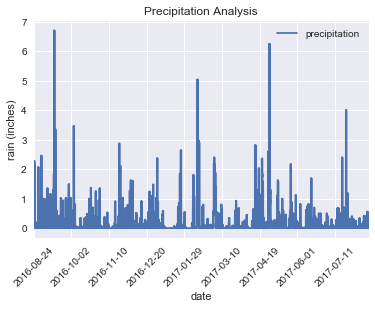

In [26]:
prcp_df.plot()
plt.xlabel("date")
plt.ylabel("rain (inches)")
plt.title("Precipitation Analysis")
plt.legend(["precipitation"])
plt.xticks(rotation=45)
plt.show()

In [27]:
prcp_df.describe()

,prcp
count,4446.000000
mean,0.159951
std,0.441170
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [28]:
locations = session.query(Measurements).group_by(Measurements.station).count()
print(f"There are {locations} stations.")

There are 9 stations.


In [30]:
most_active = session.query(Measurements.station, func.count(Measurements.tobs)).group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc()).all()

most = most_active[0][0] 

for station, count in most_active:
    print(f"Station {station} had {count} weather observations.")
    
print(f"The busiest station {most} had {most_active[0][1]} weather observations.")

Station USC00519281 had 5544 weather observations.
Station USC00519397 had 5448 weather observations.
Station USC00513117 had 5418 weather observations.
Station USC00519523 had 5338 weather observations.
Station USC00516128 had 5224 weather observations.
Station USC00514830 had 4404 weather observations.
Station USC00511918 had 3958 weather observations.
Station USC00517948 had 2744 weather observations.
Station USC00518838 had 1022 weather observations.
The busiest station USC00519281 had 5544 weather observations.


In [31]:
temperature = session.query(Measurements.station, Measurements.date, Measurements.tobs).filter(Measurements.station == busiest).filter(Measurements.date > last_year).order_by(Measurements.date).all()

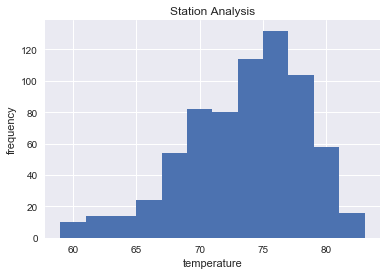

In [32]:
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("temperature")
plt.ylabel("frequency")
plt.title("Station Analysis")
plt.show()

In [48]:
def calc_temps(start_date, end_date):
    start_date = start_date.split('-')
    last_start_year = int(start_date[0]) - 1
    start = f"{last_start_year}-{start_date[1]}-{start_date[2]}"

    end_date = end_date.split('-')
    last_end_year = int(end_date[0]) - 1
    end = f"{last_end_year}-{end_date[1]}-{end_date[2]}"

    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).filter(Measurements.date >= start).filter(Measurements.date <= end).all()

temps = (calc_temps('2017-02-11', '2017-02-25'))
print(temps)

[(60, 70.69473684210526, 79)]


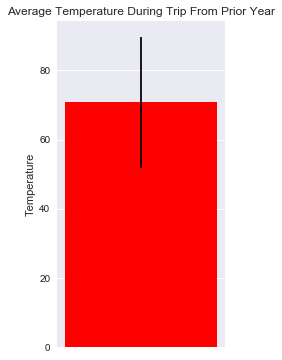

In [76]:
yerr = temps[0][2]-temps[0][0]
avg = temps[0][1]

fig, ax = plt.subplots(figsize=(3, 6))
bar_chart = ax.bar(1, avg, color= 'red', yerr=yerr)
ax.set_ylabel("Temperature")
ax.set_title("Average Temperature During Trip From Prior Year")
ax.get_xaxis().set_visible(False)
plt.show()